In [34]:
#importing libraries 
import pandas as pd 
from datasets import load_dataset 
import matplotlib.pyplot as plt 

#loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning data 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [35]:
df_india = df[df['job_country'] == 'India'].copy()

In [36]:
df_india['job_posted_month'] = df_india['job_posted_date'].dt.strftime('%B')
df_india['job_posted_month']

16            June
19           April
29           March
38            July
42        November
            ...   
785712       March
785715       March
785716       March
785718       March
785740       March
Name: job_posted_month, Length: 51088, dtype: object

In [37]:
df_india_pivot = df_india.pivot_table(index= 'job_posted_month' , columns = 'job_title_short', aggfunc = 'size') 

In [38]:
df_india_pivot.reset_index(inplace= True)
df_india_pivot['month_no'] = pd.to_datetime(df_india_pivot["job_posted_month"] , format = '%B').dt.month
df_india_pivot['month_no']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_no, dtype: int32

In [39]:
df_india_pivot.sort_values('month_no',inplace = True)
df_india_pivot.set_index('job_posted_month', inplace = True )
df_india_pivot.drop(columns = 'month_no', inplace = True)

<Axes: xlabel='job_posted_month'>

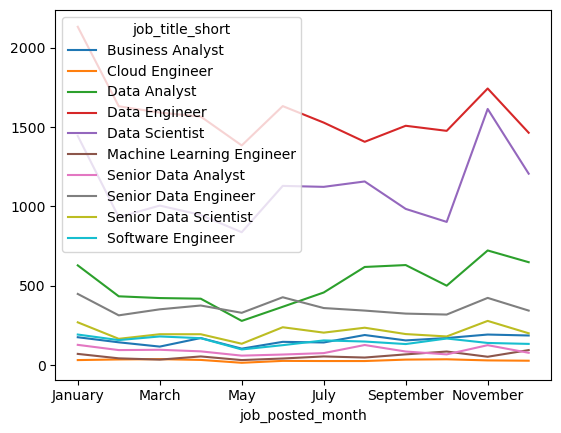

In [40]:
df_india_pivot.plot(kind = "line")

In [41]:
top_3 = df_india['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()

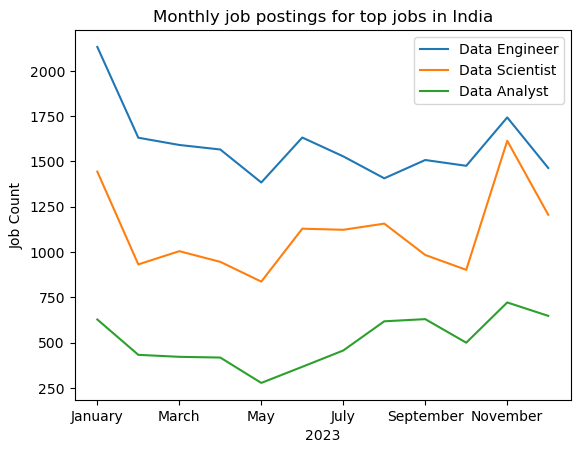

In [42]:
df_india_pivot[top_3].plot(kind = "line")
plt.title('Monthly job postings for top jobs in India')
plt.xlabel("2023")
plt.ylabel('Job Count')
plt.legend()
plt.show()

In [43]:
df_india_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


In [44]:
df_india_software_pivot = pd.read_csv("https://lukeb.co/software_csv")
df_india_software_pivot.set_index('job_posted_month')

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [45]:
df_india_merged = df_india_pivot.merge(df_india_software_pivot , on = "job_posted_month")
df_india_merged

,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,January,175,31,628,2132,1444,70,127,448,269,192,13619,9827,5108,4348
1,February,143,35,433,1631,932,42,94,313,165,157,11456,9116,7298,4284
2,March,116,37,422,1591,1005,34,96,351,194,180,11102,8178,5814,4159
3,April,170,32,418,1566,946,54,86,375,194,169,14037,9209,7232,4220
4,May,103,14,278,1384,837,31,59,329,134,98,12126,8864,6718,4980
5,June,146,26,367,1632,1129,41,66,427,238,125,12003,8065,5902,4781
6,July,142,25,457,1528,1123,54,75,359,204,155,11914,8061,6839,4344
7,August,189,25,618,1407,1157,47,126,343,235,148,11571,8191,7413,4104
8,September,155,34,630,1508,984,67,85,324,195,132,14016,8447,6139,4094
9,October,170,36,500,1476,902,85,67,318,180,167,11419,8476,5026,4389


In [64]:
top_5 = df_india_merged.sum(numeric_only=True).sort_values(ascending=False).head().index.to_list()
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

(0.0, 20000.0)

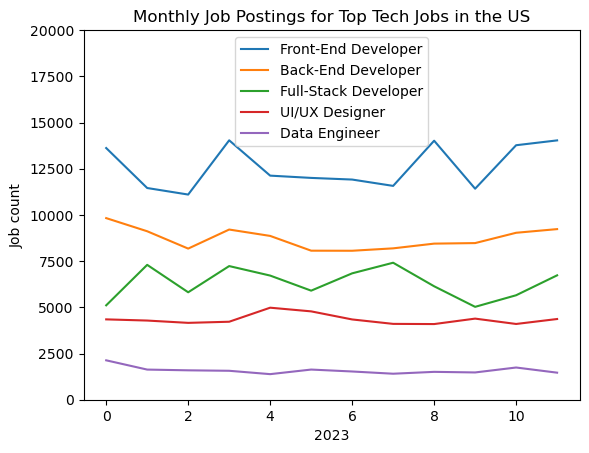

In [67]:
df_india_merged[top_5].plot(kind="line")
plt.title('Monthly Job Postings for Top Tech Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job count')
plt.legend()
plt.ylim(0, 20000)